#### Add Root Directory and Ignore warning

In [1]:
import os
os.chdir('..')
import warnings
warnings.filterwarnings('ignore')


# Credit Risk Analysis

### What is the concepts of credit risk 

#### What is Credit Risk Analysis

Credit Risk Analysis is the process of evaluating the likelihood that a borrower will default on their debt obligations. It involves assessing the potential risk that a lender faces when lending money or extending credit to an individual, business, or organization. The goal is to understand how likely the borrower is to repay the loan, as well as the potential impact on the lender if the borrower fails to meet the repayment terms.

# Exploratory Data Analysis (EDA)

#### Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Overview of the Data

To understand the structure of the dataset, including the number of rows, columns, and data types

#### Data Loading

In [3]:
data=pd.read_csv('docs/data.csv')


#### Check Loaded Dataset

In [4]:
data.head()


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

### Summary Statistics

To understand the central tendency, dispersion, and shape of the dataset’s distribution.

In [6]:
data.describe()


,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


### Distribution of Numerical Features

In [7]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns


Because of Amount and Value columns have many values first I check the rest columns

In [8]:
for col in numerical_columns:
    if col=='Amount' or col=='Value':
        continue
    else:
        print(f'Value count of {data[col].value_counts()}\n And')
        
        print(f'{data[col].nunique()} Unique Value\n\n')


Value count of CountryCode
256    95662
Name: count, dtype: int64
 And
1 Unique Value


Value count of PricingStrategy
2    79848
4    13562
1     1867
0      385
Name: count, dtype: int64
 And
4 Unique Value


Value count of FraudResult
0    95469
1      193
Name: count, dtype: int64
 And
2 Unique Value




numerical columns that have many unique values

In [9]:
print(data['Amount'].value_counts())


Amount
 1000.00      17091
-50.00         8513
 10000.00      8260
 2000.00       5489
 500.00        5246
              ...  
 6534.00          1
-6.45             1
-204.40           1
-2720.00          1
 243000.00        1
Name: count, Length: 1676, dtype: int64


numerical columns that have many unique values

In [10]:
print(data['Amount'].value_counts())


Amount
 1000.00      17091
-50.00         8513
 10000.00      8260
 2000.00       5489
 500.00        5246
              ...  
 6534.00          1
-6.45             1
-204.40           1
-2720.00          1
 243000.00        1
Name: count, Length: 1676, dtype: int64


Visualize the distribution of numerical features


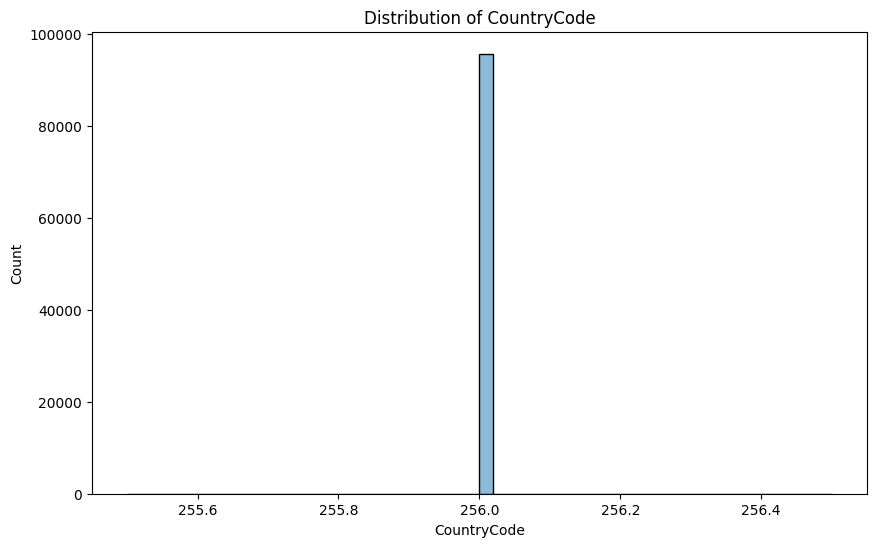

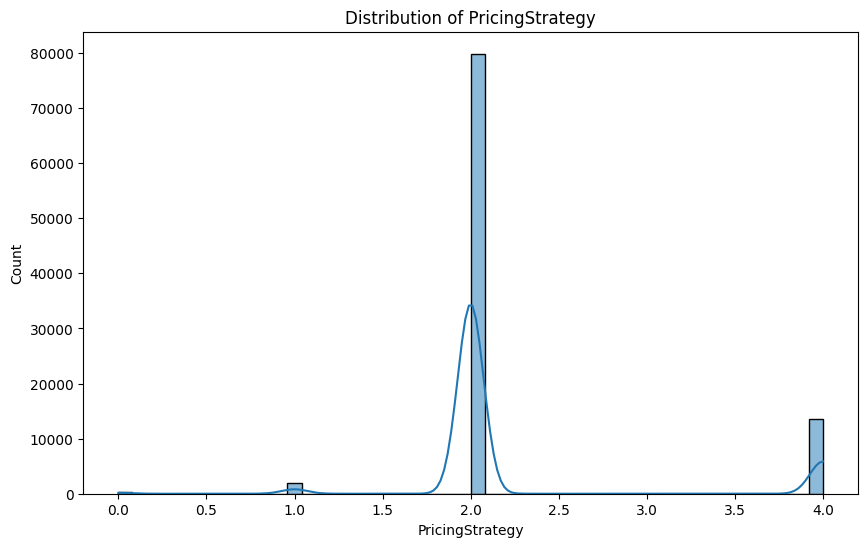

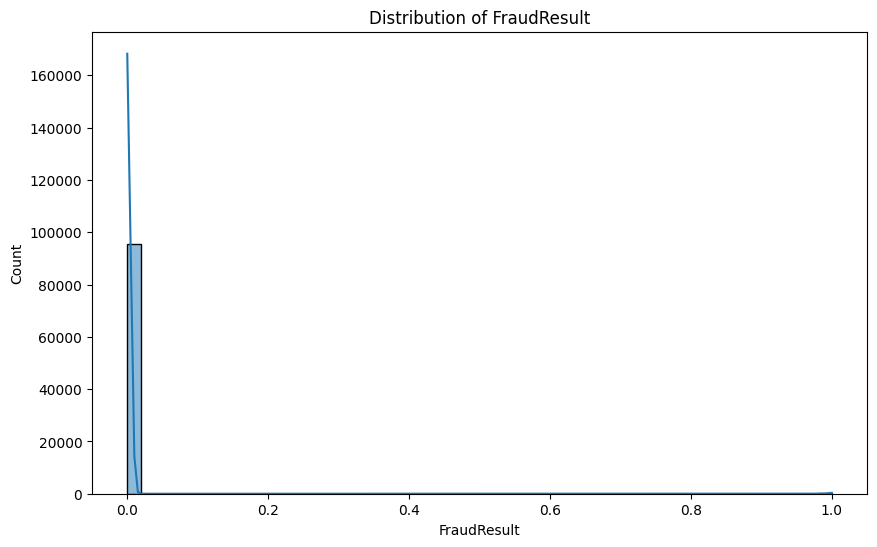

In [11]:
low_unique_columns = ['CountryCode', 'PricingStrategy','FraudResult']
for col in low_unique_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col],bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


In [12]:
high_unique_columns = ['Value', 'Amount']


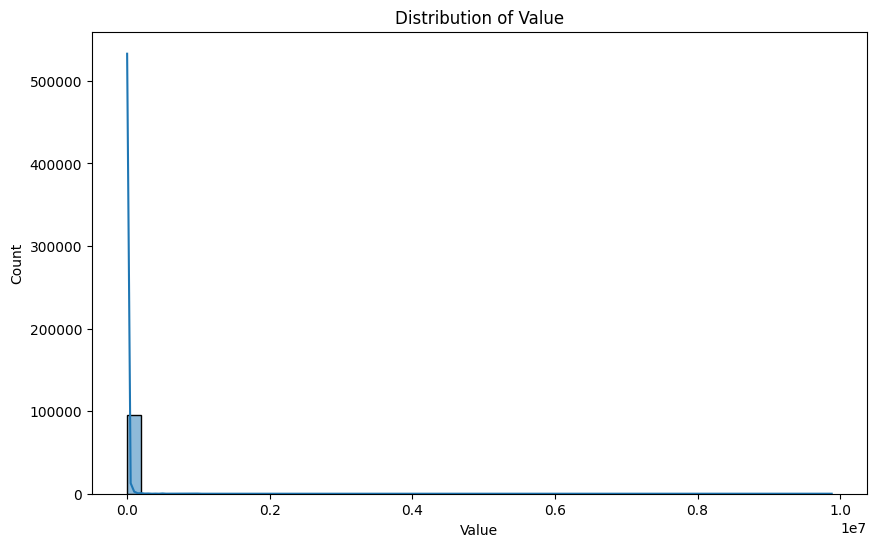

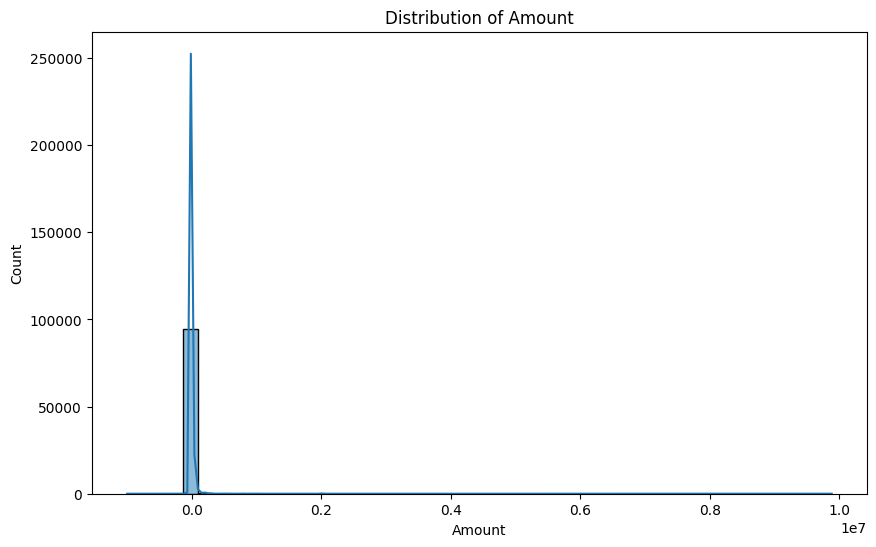

In [13]:
for col in high_unique_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], bins=50, kde=True) 
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


### Distribution of Categorical Features

Analyzing the distribution of categorical features provides insights into the frequency and variability of categories.


In [14]:
# Identify categorical features
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)


Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'ProviderId', 'ProductId', 'ProductCategory',
       'ChannelId', 'TransactionStartTime'],
      dtype='object')


Distribution of many values column

In [15]:
print(data['AccountId'].value_counts())


AccountId
AccountId_4841    30893
AccountId_4249     4457
AccountId_4840     1738
AccountId_3206     1105
AccountId_318      1070
                  ...  
AccountId_2728        1
AccountId_3778        1
AccountId_1259        1
AccountId_1948        1
AccountId_918         1
Name: count, Length: 3633, dtype: int64


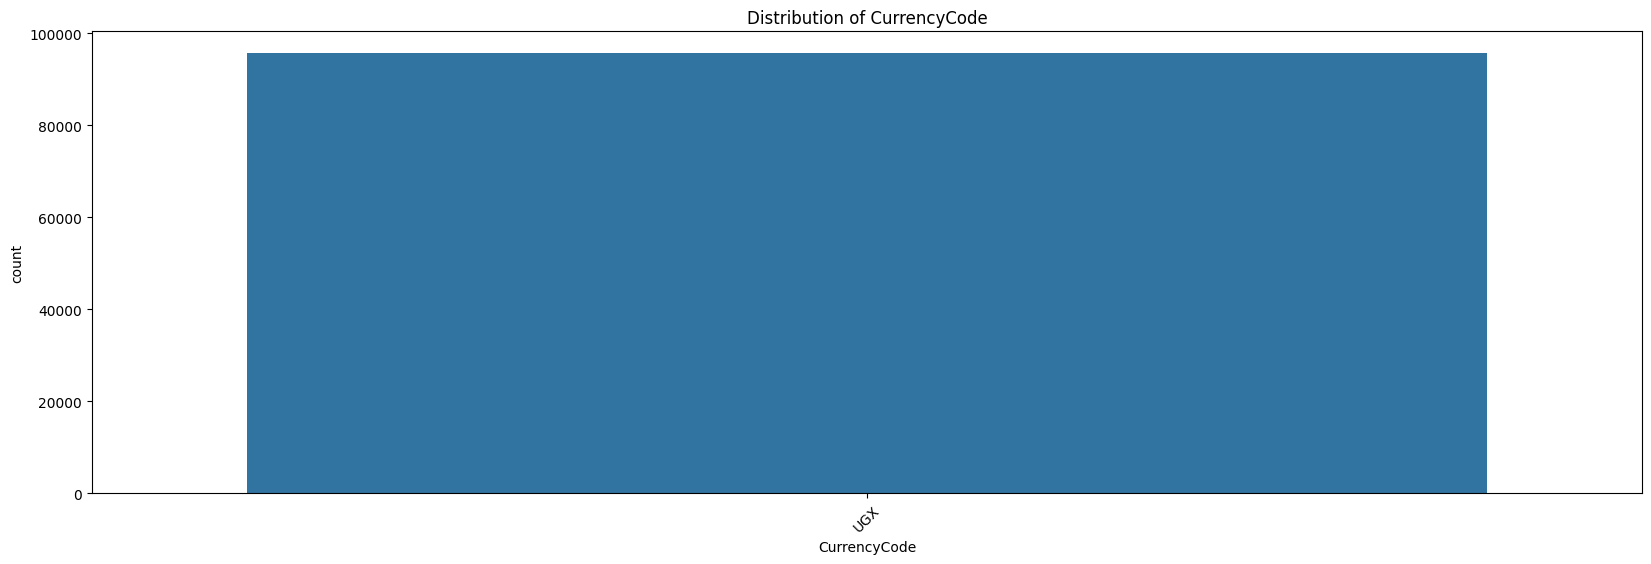

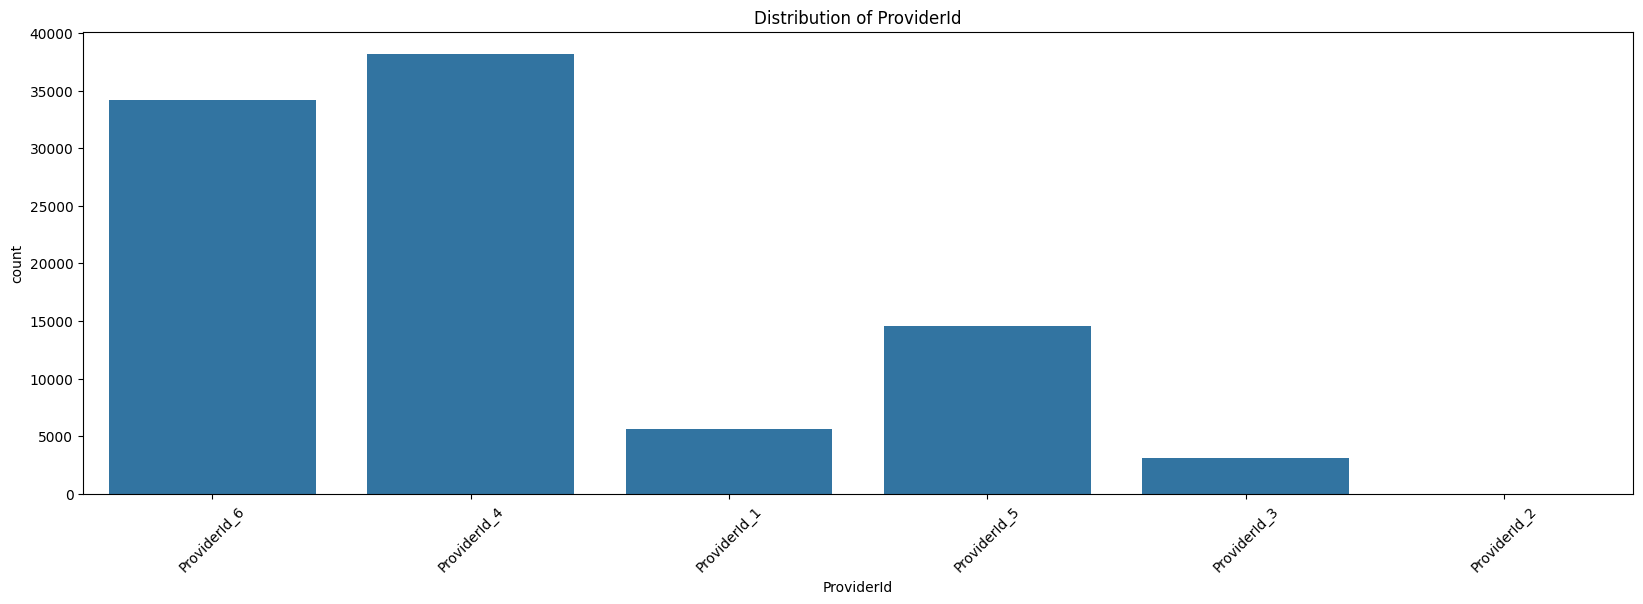

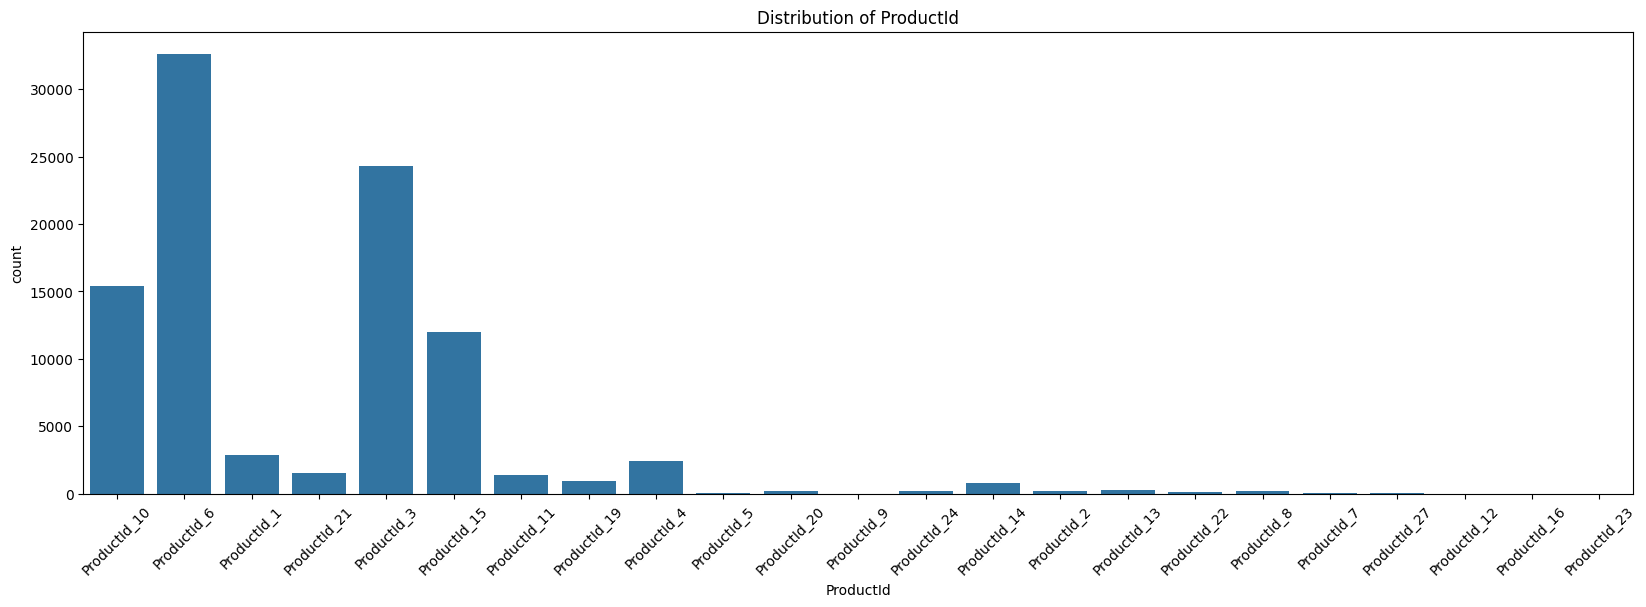

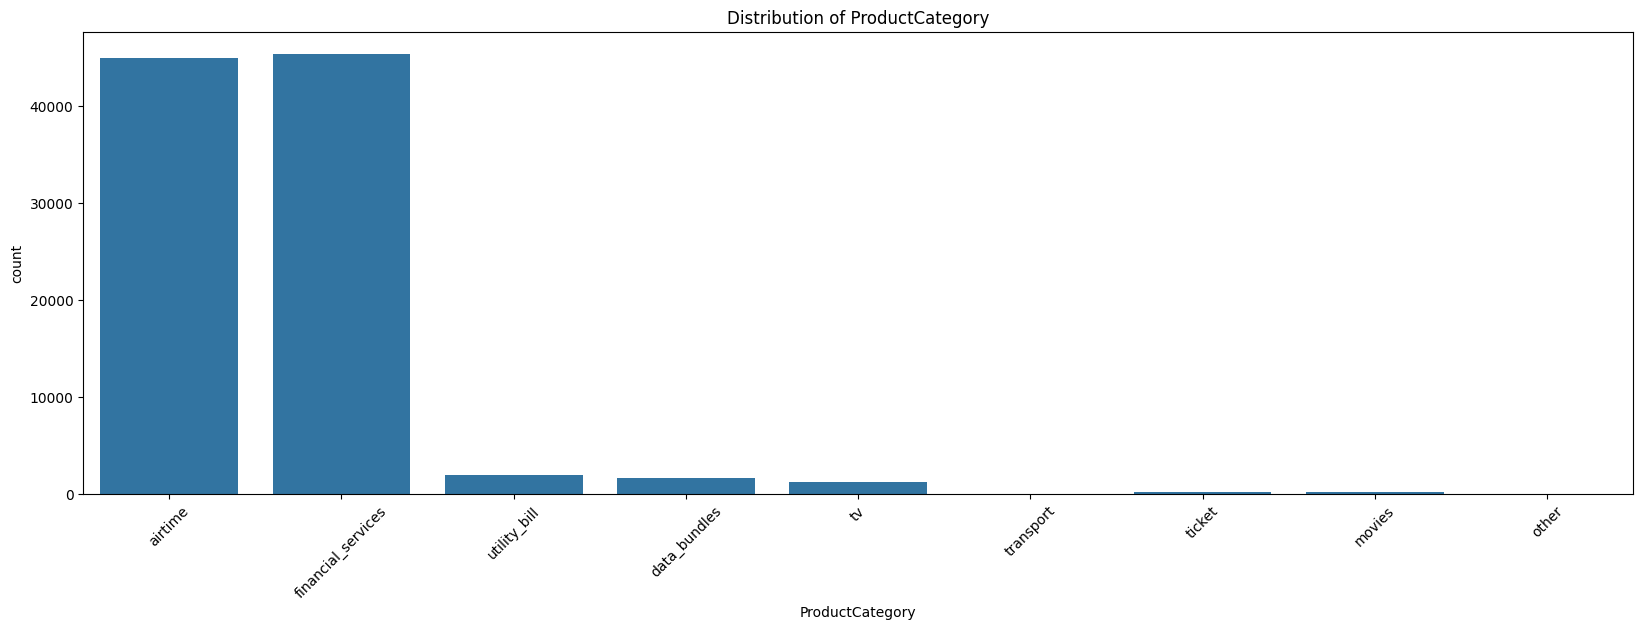

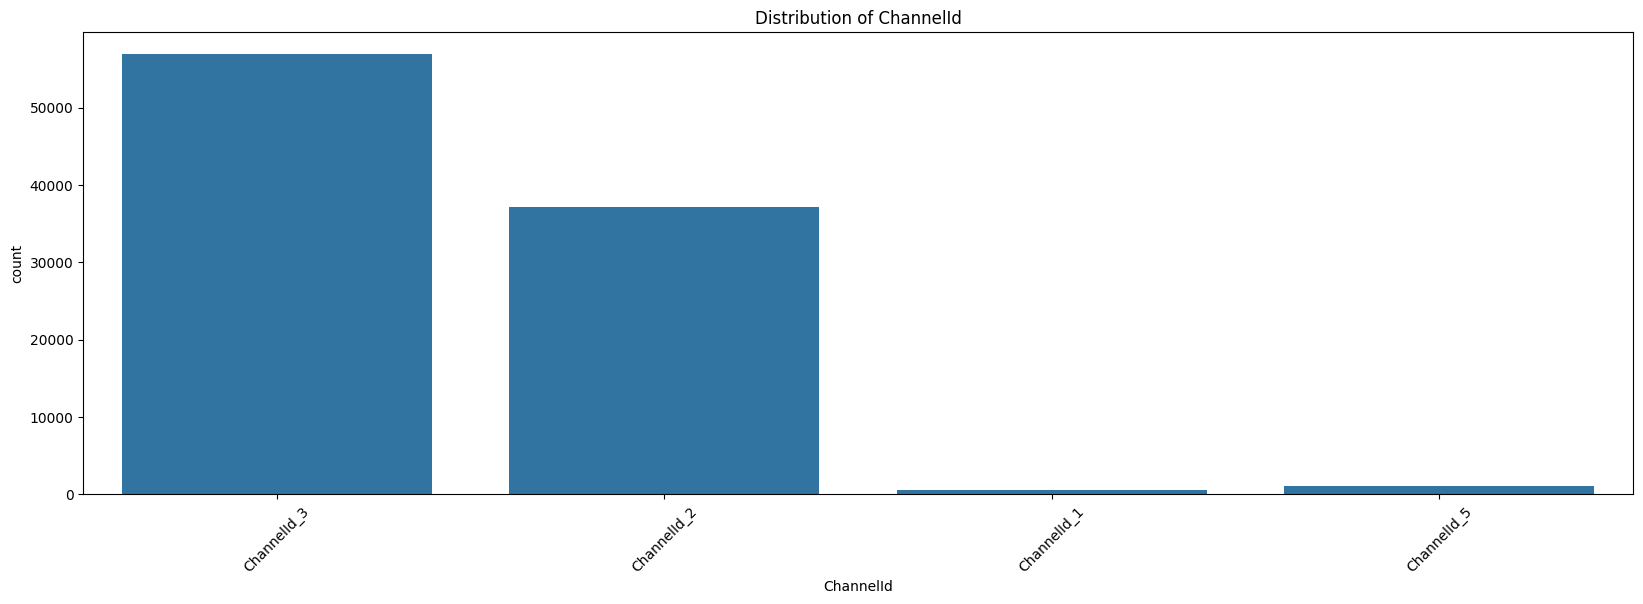

In [16]:
for col in ['CurrencyCode','ProviderId','ProductId','ProductCategory','ChannelId']:
    plt.figure(figsize=(20, 6))
    sns.countplot(data=data, x=data[col])
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45) 
    plt.show()


### Correlation Analysis

To Understanding the relationship between numerical features.


In [17]:
numerical_data=data.select_dtypes(include=['float64', 'int64'])
corr_numerical_columns=numerical_data.drop(['CountryCode'],axis=1)



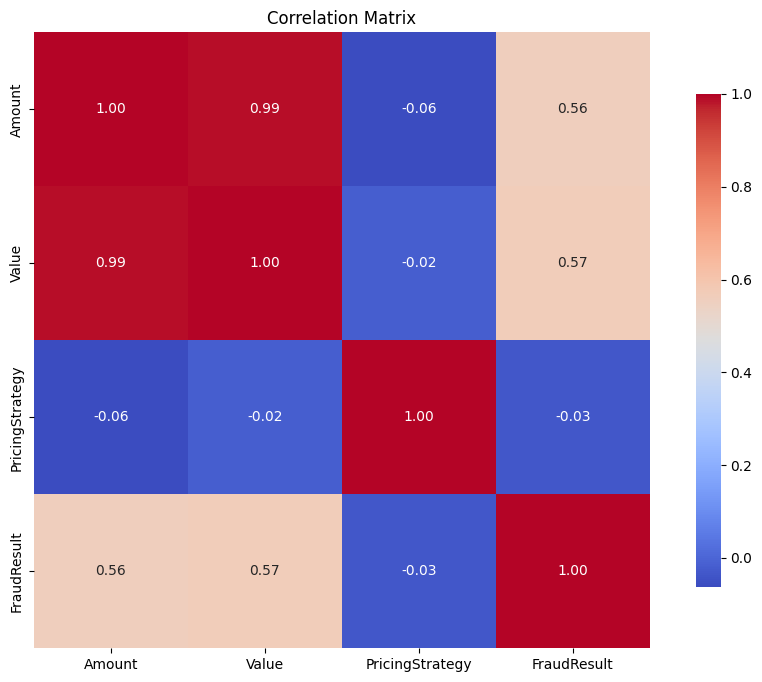

In [18]:
correlation_matrix=corr_numerical_columns.corr()
# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Set titles and labels
plt.title('Correlation Matrix')
plt.show()


### Identifying Missing Values

Identify missing values to determine missing data and decide on appropriate imputation strategies.

In [19]:
def find_missing_values(df):
    """
    Finds missing values and returns a summary.

    Args:
        df: The DataFrame to check for missing values.

    Returns:
        A summary of missing values, including the number of missing values per column.
    """

    null_counts = df.isnull().sum()
    missing_value = null_counts
    percent_of_missing_value = 100 * null_counts / len(df)
    data_type = df.dtypes

    missing_data_summary = pd.concat([missing_value, percent_of_missing_value, data_type], axis=1)
    missing_data_summary_table = missing_data_summary.rename(columns={0: "Missing values", 1: "Percent of Total Values", 2: "DataType"})
    missing_data_summary_table = missing_data_summary_table[missing_data_summary_table.iloc[:, 1] != 0].sort_values('Percent of Total Values', ascending=False).round(1)

    print(f"From {df.shape[1]} columns selected, there are {missing_data_summary_table.shape[0]} columns with missing values.")

    return missing_data_summary_table


The Datasets have no missing values

In [20]:
find_missing_values(data)


From 16 columns selected, there are 0 columns with missing values.


,Missing values,Percent of Total Values,DataType


### Outlier Detection

Using box plots to identify outliers.

From Numerical Columns Amount and Value have Outliers

In [21]:
def boxPlotForDetectOutliers(train_data,column_names):
    for column in column_names:
        sns.boxplot(data=train_data[column])
        plt.title(f"Box Plot of {column}")
        plt.show()


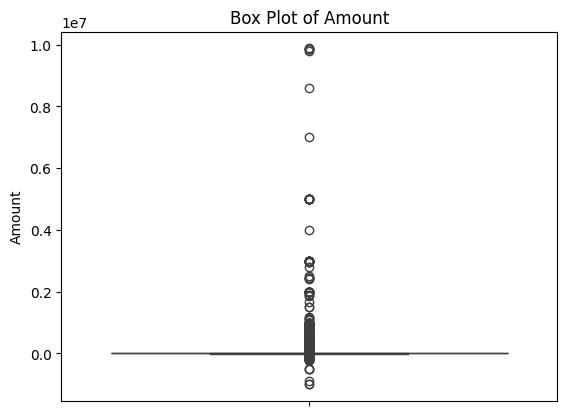

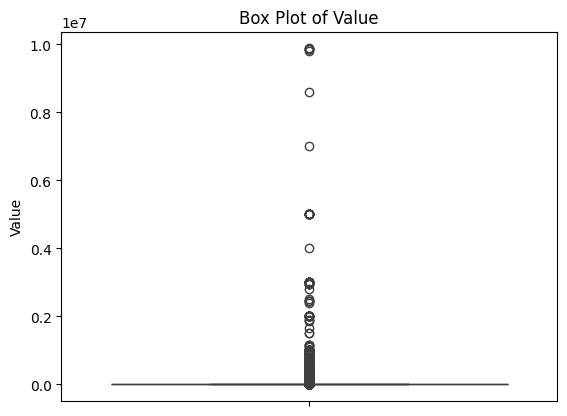

In [22]:
boxPlotForDetectOutliers(data,['Amount','Value'])


## Remove outliers

In [23]:
def remove_outliers_winsorization(data,column_names):
    """
    Removes outliers from specified columns of a DataFrame using winsorization.

    Args:
        data: The input DataFrame.
        column_names (list): A list of column names to process.

    Returns:
        The DataFrame with outliers removed.
    """

    for column_name in column_names:
        q1 = data[column_name].quantile(0.25)
        q3 = data[column_name].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        data[column_name] = data[column_name].clip(lower_bound, upper_bound)

    return data


In [24]:
data=remove_outliers_winsorization(data, ['Amount','Value'])


In [25]:
data.head()


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000.0,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20.0,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500.0,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,7075.0,12087.5,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644.0,2018-11-15T03:34:21Z,2,0


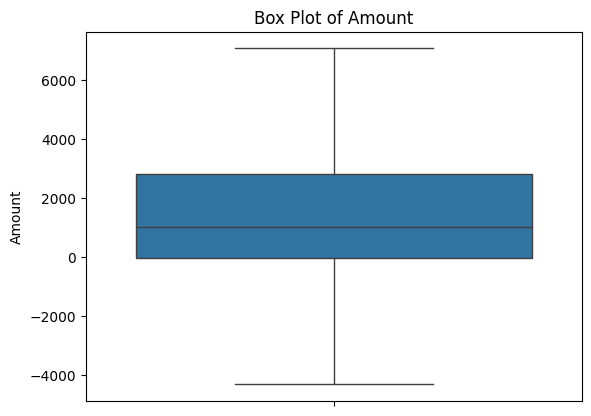

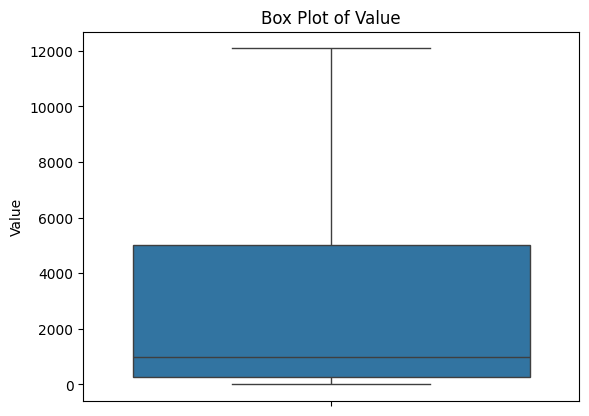

In [26]:
boxPlotForDetectOutliers(data,['Amount','Value'])


# Feature Engineering

### Aggregate Features

In [27]:
data.head()


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000.0,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20.0,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500.0,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,7075.0,12087.5,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644.0,2018-11-15T03:34:21Z,2,0


In [28]:
data.shape


(95662, 16)

In [29]:
# Aggregate features by customer (AccountId)
agg_data = data.groupby('AccountId').agg(
    TotalTransactionAmount=('Amount', 'sum'),
    AverageTransactionAmount=('Amount', 'mean'),
    TransactionCount=('TransactionId', 'count'),
    StdTransactionAmount=('Amount', 'std')
).reset_index()

# Merging the aggregate features back to the DataFrame
new_dataframe = pd.merge(data, agg_data, on='AccountId', how='left')
new_dataframe.head()



,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,TotalTransactionAmount,AverageTransactionAmount,TransactionCount,StdTransactionAmount
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000.0,2018-11-15T02:18:49Z,2,0,136109.0,2062.257576,66,1928.782855
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20.0,2018-11-15T02:19:08Z,2,0,-24212085.0,-783.740168,30893,1543.796173
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500.0,2018-11-15T02:44:21Z,2,0,1000.0,500.000000,2,0.000000
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,7075.0,12087.5,2018-11-15T03:32:55Z,2,0,101600.0,3907.692308,26,2756.254426
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644.0,2018-11-15T03:34:21Z,2,0,-24212085.0,-783.740168,30893,1543.796173


In [30]:
new_dataframe.shape


(95662, 20)

### Extract Date and Time Features

In [31]:
# Converting TransactionStartTime to datetime format
new_dataframe['TransactionStartTime'] = pd.to_datetime(new_dataframe['TransactionStartTime'])

# Extracting date and time-based features
new_dataframe['TransactionHour'] = new_dataframe['TransactionStartTime'].dt.hour
new_dataframe['TransactionDay'] = new_dataframe['TransactionStartTime'].dt.day
new_dataframe['TransactionMonth'] = new_dataframe['TransactionStartTime'].dt.month
new_dataframe['TransactionYear'] = new_dataframe['TransactionStartTime'].dt.year

new_dataframe[['TransactionStartTime', 'TransactionHour', 'TransactionDay', 'TransactionMonth', 'TransactionYear']].head()


,TransactionStartTime,TransactionHour,TransactionDay,TransactionMonth,TransactionYear
0,2018-11-15 02:18:49+00:00,2,15,11,2018
1,2018-11-15 02:19:08+00:00,2,15,11,2018
2,2018-11-15 02:44:21+00:00,2,15,11,2018
3,2018-11-15 03:32:55+00:00,3,15,11,2018
4,2018-11-15 03:34:21+00:00,3,15,11,2018


### Encoding Categorical Variables

 using One-Hot Encoding for categorical features

Exclude Unique Identifiers and Timestamps: Columns like TransactionId, BatchId, AccountId, SubscriptionId, CustomerId, and TransactionStartTime are typically not useful for one-hot encoding.

Keep Only Meaningful Categorical Columns: Focus on columns such as CurrencyCode, ProviderId, ProductId, ProductCategory, and ChannelId.

In [32]:
from sklearn.preprocessing import OneHotEncoder

# Define the categorical columns you want to encode
categorical_columns = ['CurrencyCode', 'ProviderId', 'ProductId', 'ProductCategory','ChannelId']

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' helps avoid the dummy variable trap

# Fit and transform the categorical columns
encoded_data = encoder.fit_transform(new_dataframe[categorical_columns])

# Convert the encoded data into a DataFrame with appropriate column names
encoded_new_dataframe = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the encoded DataFrame with the original DataFrame
new_dataframe_encoded = pd.concat([new_dataframe.reset_index(drop=True), encoded_new_dataframe], axis=1)

# Drop the original categorical columns (since we now have their encoded versions)
new_dataframe_encoded.drop(columns=categorical_columns, inplace=True)

# Print the final DataFrame after encoding
new_dataframe_encoded.head()



,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CountryCode,Amount,Value,TransactionStartTime,PricingStrategy,...,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,256,1000.0,1000.0,2018-11-15 02:18:49+00:00,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,256,-20.0,20.0,2018-11-15 02:19:08+00:00,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,256,500.0,500.0,2018-11-15 02:44:21+00:00,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,256,7075.0,12087.5,2018-11-15 03:32:55+00:00,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,256,-644.0,644.0,2018-11-15 03:34:21+00:00,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Handling Missing Values

The given datasets have no any missing values

### Normalization of Numerical Features

Normalization: Rescale the numerical features to the range [0, 1] using MinMaxScaler

In [33]:
new_dataframe_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 57 columns):
 #   Column                              Non-Null Count  Dtype              
---  ------                              --------------  -----              
 0   TransactionId                       95662 non-null  object             
 1   BatchId                             95662 non-null  object             
 2   AccountId                           95662 non-null  object             
 3   SubscriptionId                      95662 non-null  object             
 4   CustomerId                          95662 non-null  object             
 5   CountryCode                         95662 non-null  int64              
 6   Amount                              95662 non-null  float64            
 7   Value                               95662 non-null  float64            
 8   TransactionStartTime                95662 non-null  datetime64[ns, UTC]
 9   PricingStrategy                     956

In [34]:
numerical_columns_new=new_dataframe_encoded.select_dtypes(include=['float64', 'int64','int32']).columns


In [35]:
print(numerical_columns_new)


Index(['CountryCode', 'Amount', 'Value', 'PricingStrategy', 'FraudResult',
       'TotalTransactionAmount', 'AverageTransactionAmount',
       'TransactionCount', 'StdTransactionAmount', 'TransactionHour',
       'TransactionDay', 'TransactionMonth', 'TransactionYear',
       'ProviderId_ProviderId_2', 'ProviderId_ProviderId_3',
       'ProviderId_ProviderId_4', 'ProviderId_ProviderId_5',
       'ProviderId_ProviderId_6', 'ProductId_ProductId_10',
       'ProductId_ProductId_11', 'ProductId_ProductId_12',
       'ProductId_ProductId_13', 'ProductId_ProductId_14',
       'ProductId_ProductId_15', 'ProductId_ProductId_16',
       'ProductId_ProductId_19', 'ProductId_ProductId_2',
       'ProductId_ProductId_20', 'ProductId_ProductId_21',
       'ProductId_ProductId_22', 'ProductId_ProductId_23',
       'ProductId_ProductId_24', 'ProductId_ProductId_27',
       'ProductId_ProductId_3', 'ProductId_ProductId_4',
       'ProductId_ProductId_5', 'ProductId_ProductId_6',
       'ProductId_Prod

In [36]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
normalized_data = min_max_scaler.fit_transform(new_dataframe_encoded[numerical_columns_new])


In [37]:


# Convert the normalized data to a DataFrame with the original column names
normalized_df = pd.DataFrame(normalized_data, columns=numerical_columns_new)

df_normalized = normalized_df.copy()
df_normalized[numerical_columns_new] = normalized_df


print("Normalized DataFrame:")
df_normalized.head()



Normalized DataFrame:


,CountryCode,Amount,Value,PricingStrategy,FraudResult,TotalTransactionAmount,AverageTransactionAmount,TransactionCount,StdTransactionAmount,TransactionHour,...,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5
0,0.0,0.467105,0.082578,0.5,0.0,0.929479,0.560286,0.002104,0.414861,0.086957,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.377632,0.001489,0.5,0.0,0.000000,0.310637,1.000000,0.332054,0.086957,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.423246,0.041206,0.5,0.0,0.924321,0.423246,0.000032,0.000000,0.086957,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.000000,1.000000,0.5,0.0,0.928161,0.722166,0.000809,0.592841,0.130435,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.322895,0.053122,0.5,0.0,0.000000,0.310637,1.000000,0.332054,0.130435,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
